In [2]:
!conda install -y pandas
!conda install -y seaborn
!conda install -y scikit-learn
!conda install -y statsmodels
!conda install -y seaborn
!conda install -y nbconvert
import pandas as pd
from sklearn import linear_model
import statsmodels.api
import seaborn as sns 
import glob
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import svm
from sklearn.model_selection import train_test_split
from mlxtend.evaluate import paired_ttest_kfold_cv
from sklearn.utils import shuffle
from sklearn.model_selection import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [6]:

filenames = glob.glob('data_2019/*.csv')
li = []
for filename in filenames: 
    df = pd.read_csv(filename, index_col=None, header=0)
    filename = filename.replace('data_2019/', "")
    filename = filename.replace('.csv', '')
    df['Day'] = filename
    df.rename(columns= {'Day' : 'Team Name'}, inplace= True)
    df['Week'] = range(1, len(df) + 1)
    li.append(df)

team_stats_init = pd.concat(li, axis= 0, ignore_index=True)
team_stats_init.rename(columns= {team_stats_init.columns[9] : 'Against'}, inplace= True)
team_stats_init.drop(team_stats_init.columns[team_stats_init.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
team_stats_init.drop(team_stats_init.columns[team_stats_init.columns.str.contains('opp',case = False)],axis = 1, inplace = True)

team_stats_init = team_stats_init.rename(columns = {team_stats_init.columns[6]: "ScoredPoints", team_stats_init.columns[7]: "FirstDowns", team_stats_init.columns[11]: "TurnoversAllowed",team_stats_init.columns[12] : "FirstAllowed", team_stats_init.columns[13] : "YardsAllowed", team_stats_init.columns[14]: "PassYardsAllowed", team_stats_init.columns[15]: "RushingYardsAllowed", team_stats_init.columns[16]: "Turnovers"})
team_stats_init.drop(team_stats_init.columns[team_stats_init.columns.str.contains('Date',case = False)],axis = 1, inplace = True)
team_stats_init.drop(team_stats_init.columns[team_stats_init.columns.str.contains('Rec',case = False)],axis = 1, inplace = True)
team_stats_init.drop(team_stats_init.columns[team_stats_init.columns.str.contains('OT',case = False)],axis = 1, inplace = True)
team_stats_init = team_stats_init.iloc[:, :13]
team_stats_init.to_csv(r"data_for_models/full_dataframe.csv")
team_stats_init.head(34)







Week Team Name               Against  ScoredPoints  FirstDowns  PassY  \
0      1  Steelers  New England Patriots           3.0        15.0  276.0   
1      2  Steelers      Seattle Seahawks          26.0        17.0  180.0   
2      3  Steelers   San Francisco 49ers          20.0        11.0  160.0   
3      4  Steelers    Cincinnati Bengals          27.0        20.0  260.0   
4      5  Steelers      Baltimore Ravens          23.0        18.0  192.0   
5      6  Steelers  Los Angeles Chargers          24.0        18.0  132.0   
6      7  Steelers              Bye Week           NaN         NaN    NaN   
7      8  Steelers        Miami Dolphins          27.0        21.0  236.0   
8      9  Steelers    Indianapolis Colts          26.0        17.0  183.0   
9     10  Steelers      Los Angeles Rams          17.0        15.0  231.0   
10    11  Steelers      Cleveland Browns           7.0        18.0  178.0   
11    12  Steelers    Cincinnati Bengals          16.0        16.0  179.0   
12    13  Steelers      Cleveland Browns          20.0        18.0  199.0   
13    14  Steelers     Arizona Cardinals          23.0        20.0  135.0   
14    15  Steelers         Buffalo Bills          10.0        15.0  178.0   
15    16  Steelers         New York Jets          10.0        16.0  185.0   
16    17  Steelers      Baltimore Ravens          10.0        10.0   77.0   
17     1  Patriots   Pittsburgh Steelers          33.0        24.0  366.0   
18     2  Patriots        Miami Dolphins          43.0        27.0  255.0   
19     3  Patriots         New York Jets          30.0        21.0  313.0   
20     4  Patriots         Buffalo Bills          16.0        11.0  150.0   
21     5  Patriots   Washington Redskins          33.0        23.0  312.0   
22     6  Patriots       New York Giants          35.0        27.0  313.0   
23     7  Patriots         New York Jets          33.0        22.0  249.0   
24     8  Patriots      Cleveland Browns          27.0        19.0  239.0   
25     9  Patriots      Baltimore Ravens          20.0        22.0  268.0   
26    10  Patriots              Bye Week           NaN         NaN    NaN   
27    11  Patriots   Philadelphia Eagles          17.0        19.0  224.0   
28    12  Patriots        Dallas Cowboys          13.0        17.0  181.0   
29    13  Patriots        Houston Texans          22.0        29.0  303.0   
30    14  Patriots    Kansas City Chiefs          16.0        17.0  184.0   
31    15  Patriots    Cincinnati Bengals          34.0        19.0  116.0   
32    16  Patriots         Buffalo Bills          24.0        23.0  271.0   
33    17  Patriots        Miami Dolphins          24.0        18.0  217.0   

    RushY  TurnoversAllowed  FirstAllowed  YardsAllowed  PassYardsAllowed  \
0    32.0               1.0          24.0         465.0             366.0   
1    81.0               1.0          25.0         425.0             274.0   
2    79.0               2.0          26.0         436.0             268.0   
3    66.0               1.0          16.0         175.0             102.0   
4    77.0               2.0          22.0         277.0             139.0   
5   124.0               1.0          23.0         348.0             316.0   
6     NaN               NaN           NaN           NaN               NaN   
7   158.0               1.0          16.0         230.0             170.0   
8    90.0               2.0          22.0         328.0             189.0   
9    42.0               2.0          16.0         306.0             218.0   
10   58.0               4.0          17.0         293.0             189.0   
11  159.0               1.0          11.0         244.0             158.0   
12  124.0               1.0          19.0         279.0             173.0   
13  140.0               2.0          17.0         236.0             165.0   
14   51.0               5.0          17.0         261.0             131.0   
15   75.0               2.0          14.0         259.0             174.0   

In [4]:
for col in team_stats_init.iloc[:, 4:].columns:
    
    lin_reg_test =statsmodels.formula.api.ols(formula="ScoredPoints ~ {}".format(col), data=team_stats_init).fit()
    print(lin_reg_test.summary())




                            OLS Regression Results                            
Dep. Variable:           ScoredPoints   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     261.1
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           1.01e-47
Time:                        17:52:28   Log-Likelihood:                -1807.0
No. Observations:                 512   AIC:                             3618.
Df Residuals:                     510   BIC:                             3627.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2316      1.532     -0.804      0.4

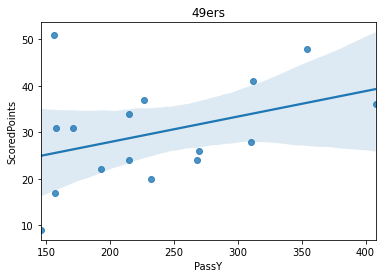

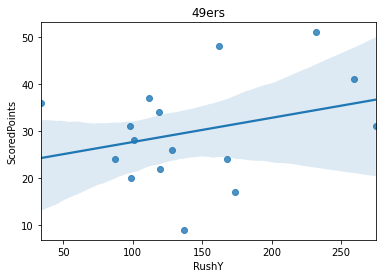

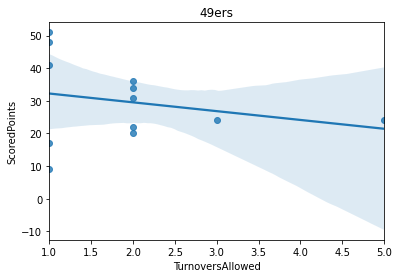

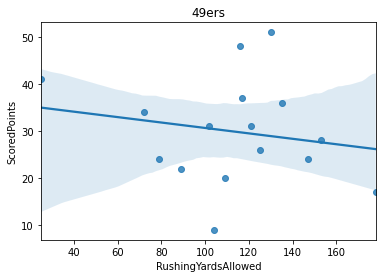

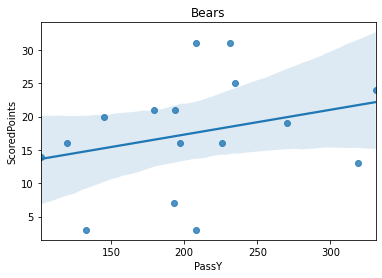

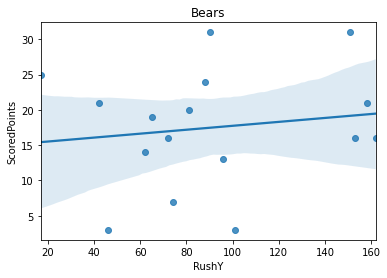

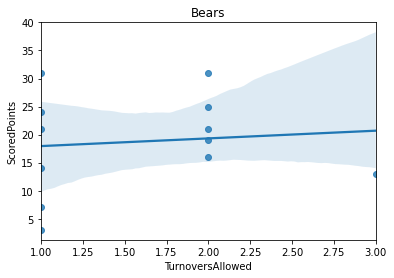

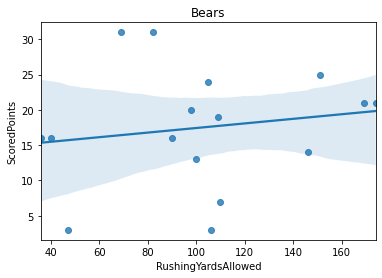

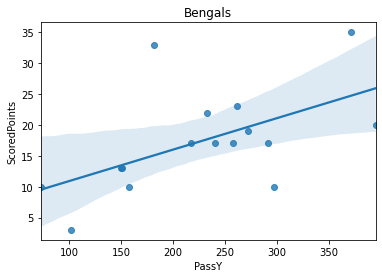

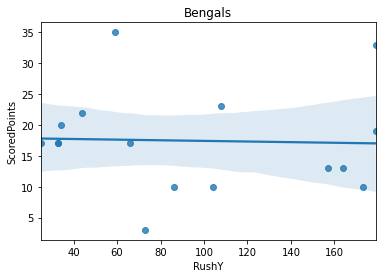

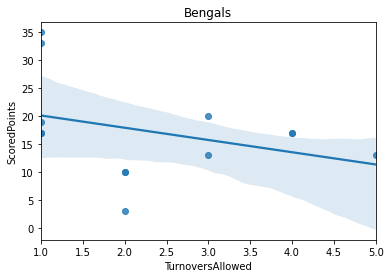

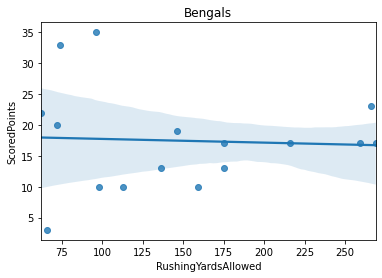

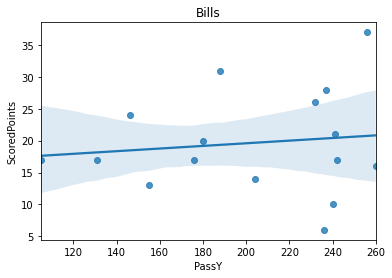

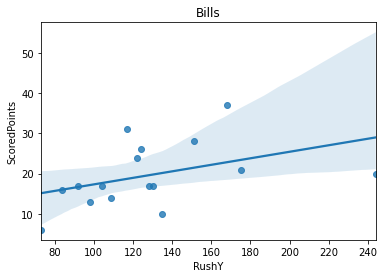

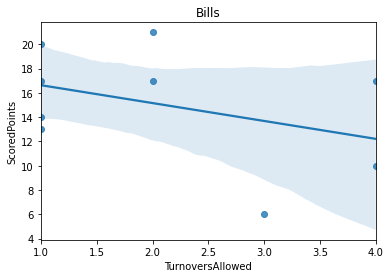

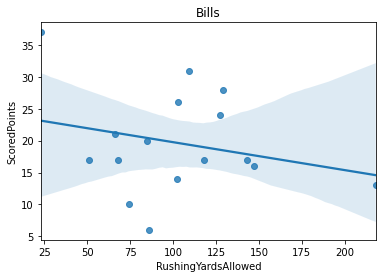

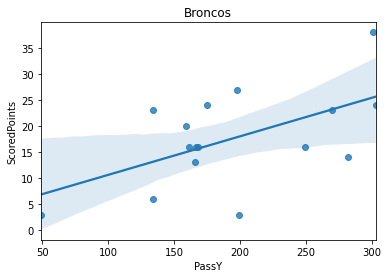

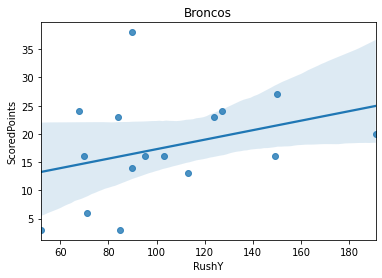

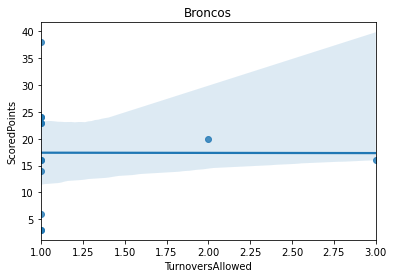

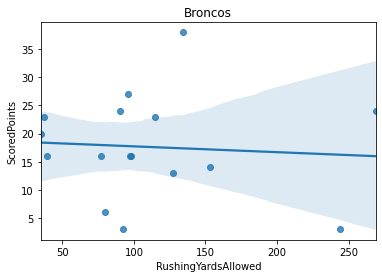

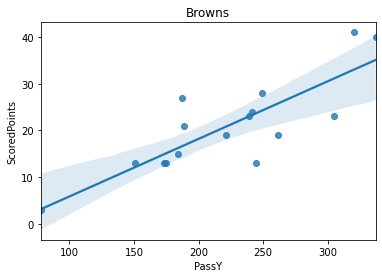

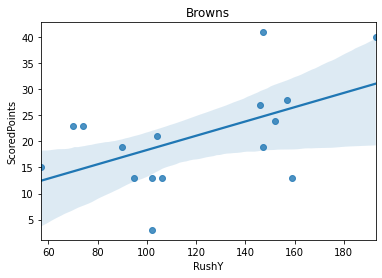

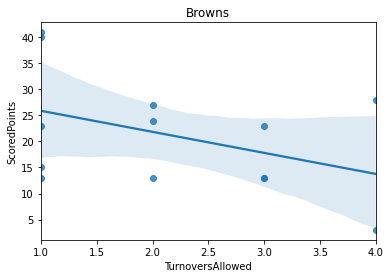

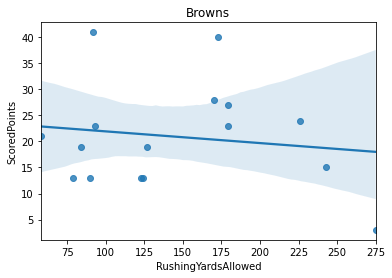

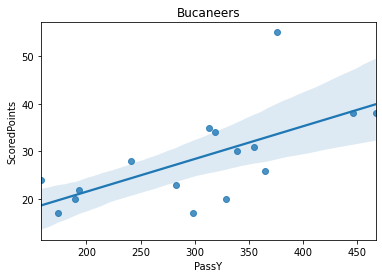

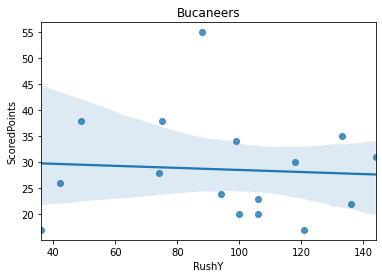

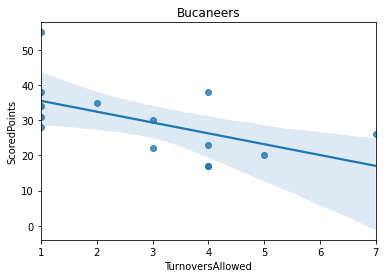

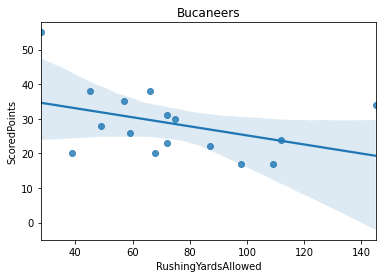

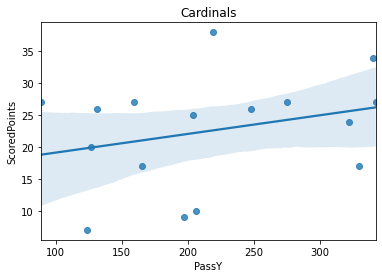

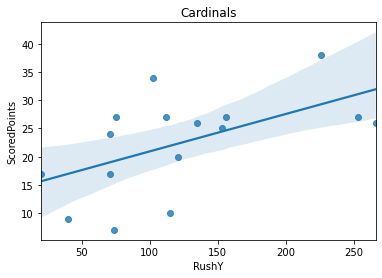

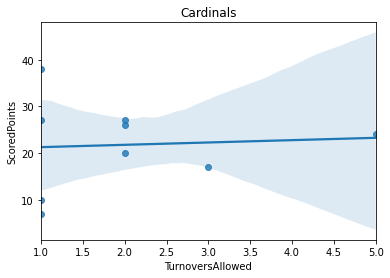

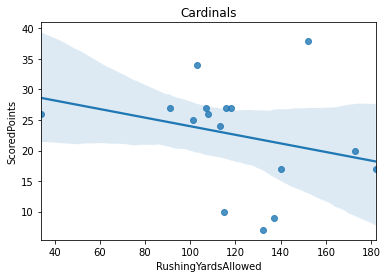

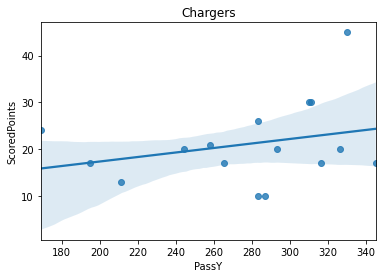

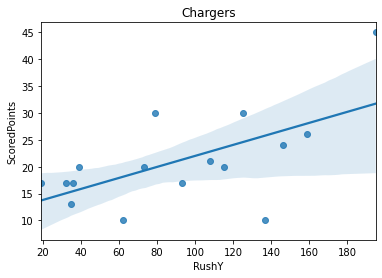

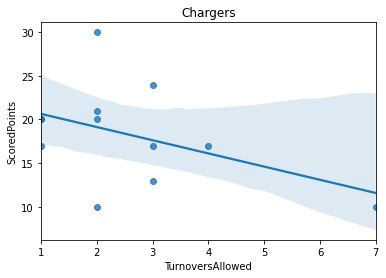

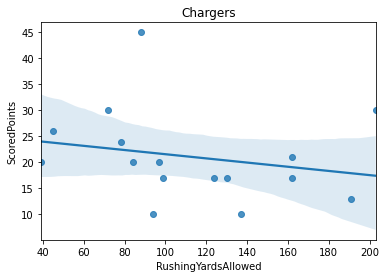

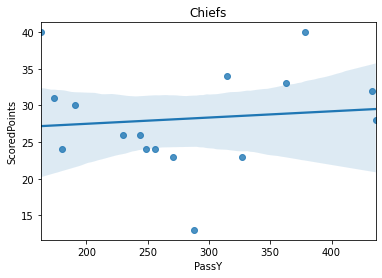

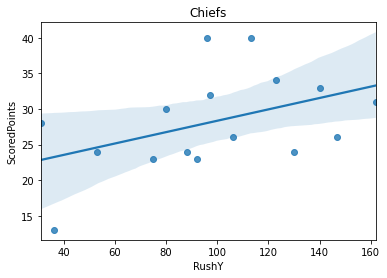

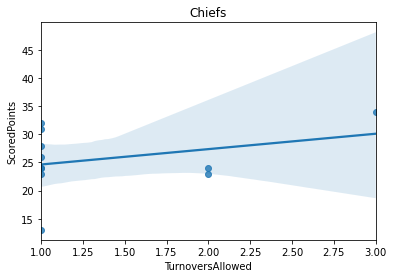

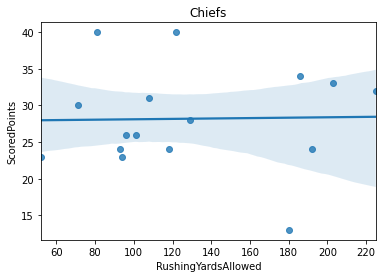

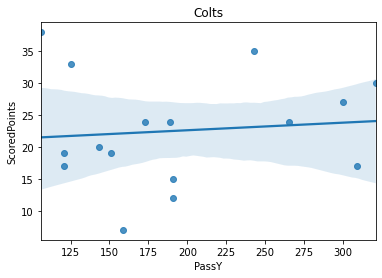

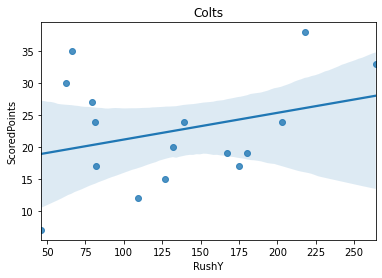

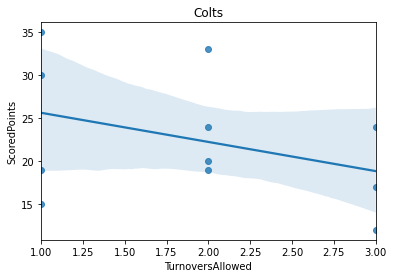

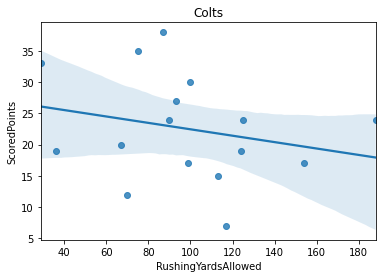

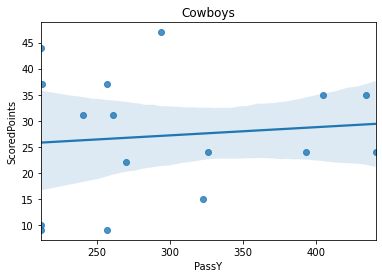

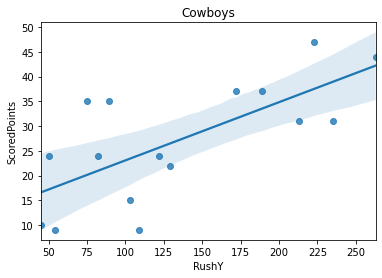

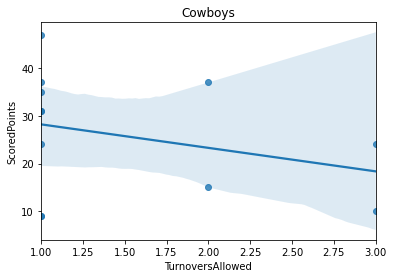

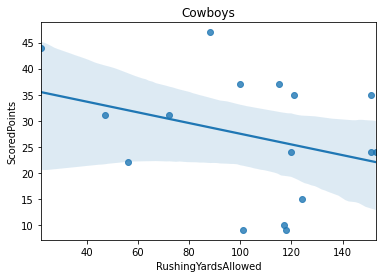

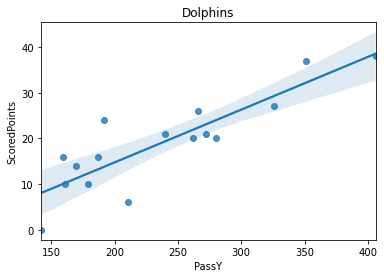

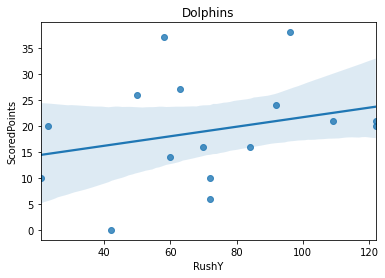

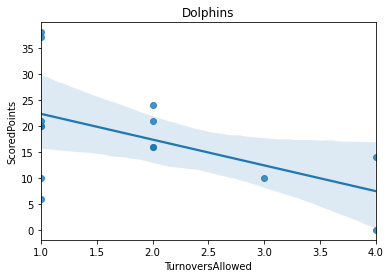

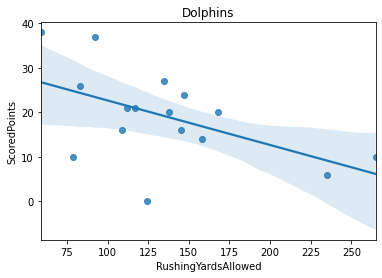

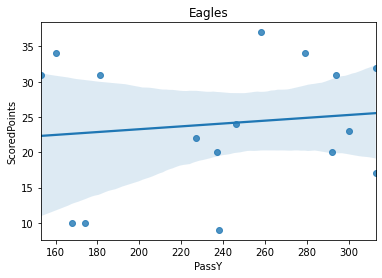

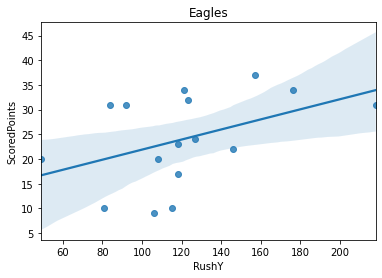

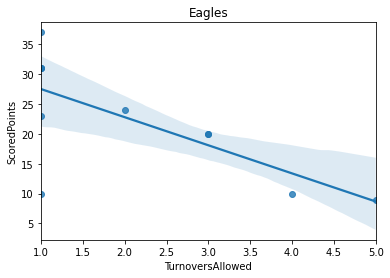

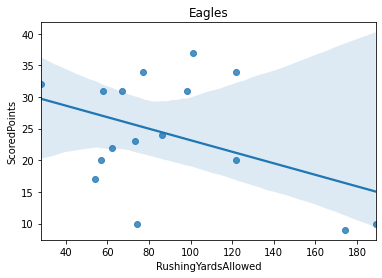

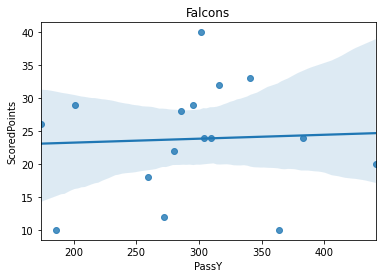

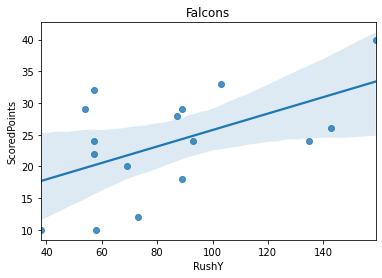

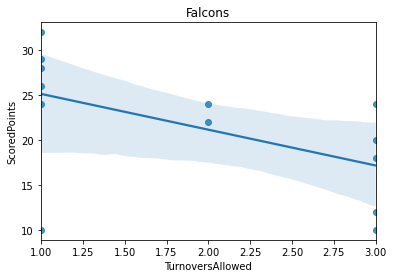

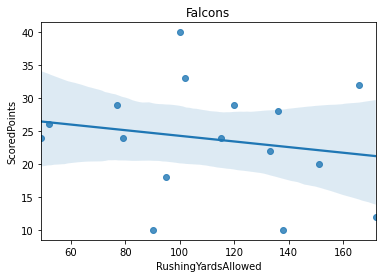

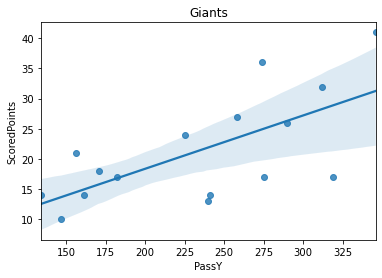

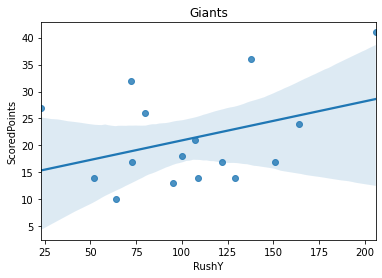

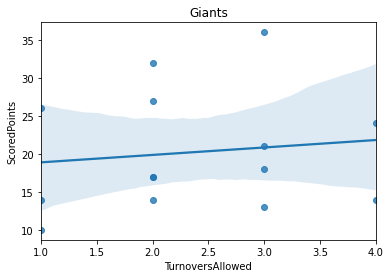

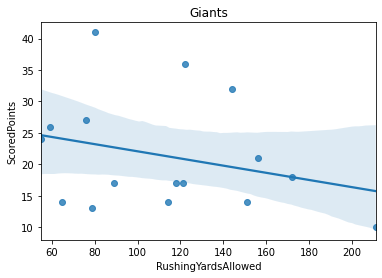

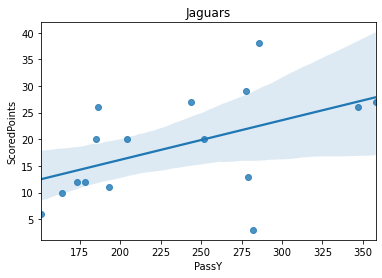

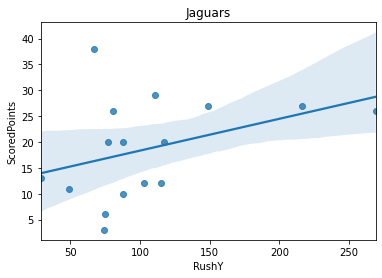

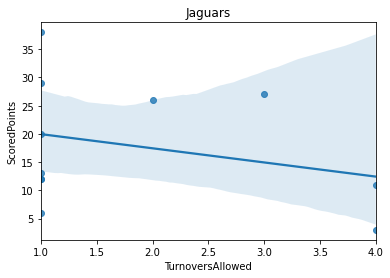

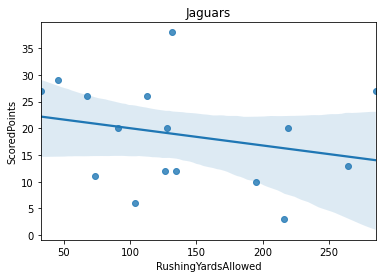

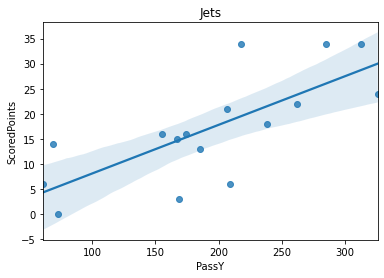

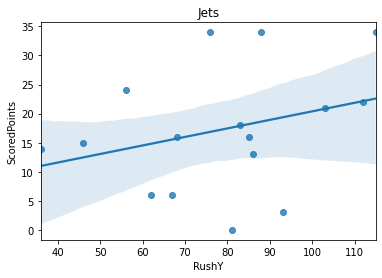

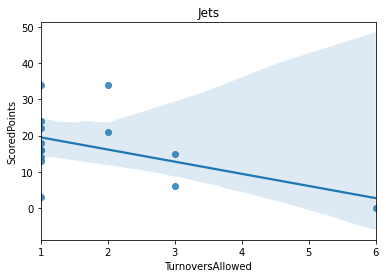

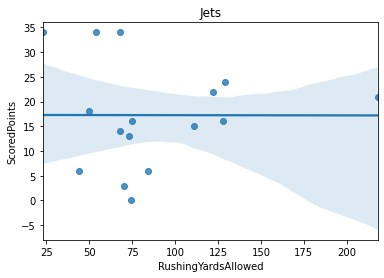

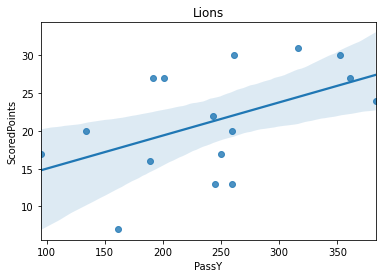

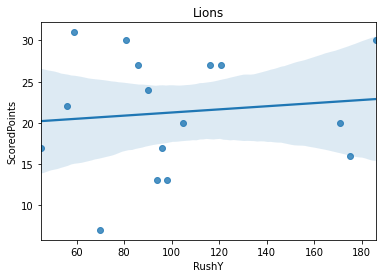

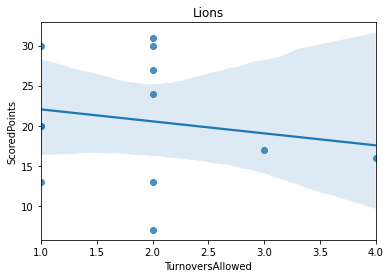

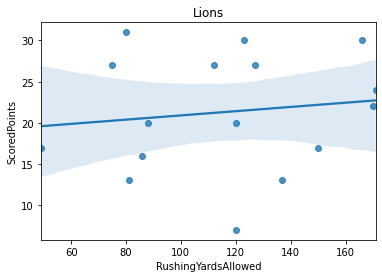

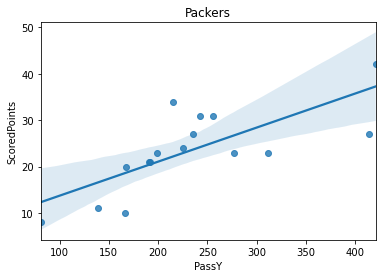

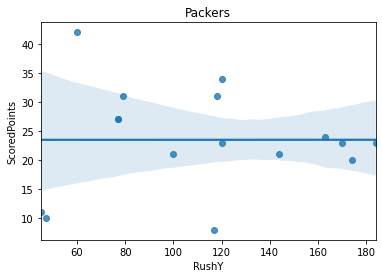

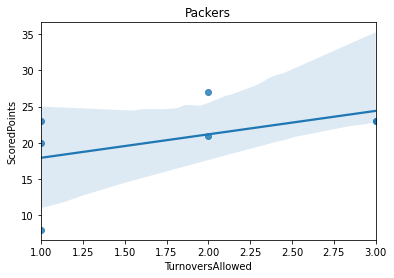

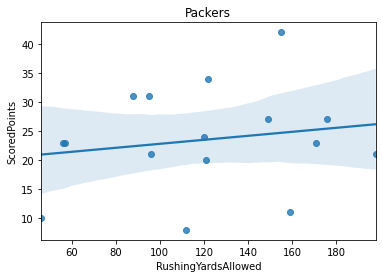

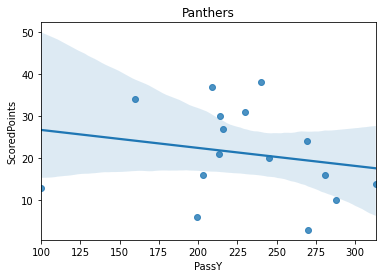

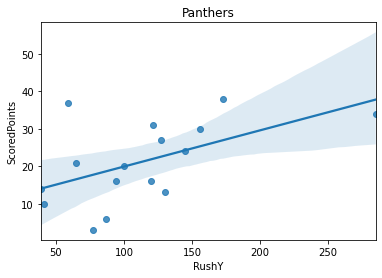

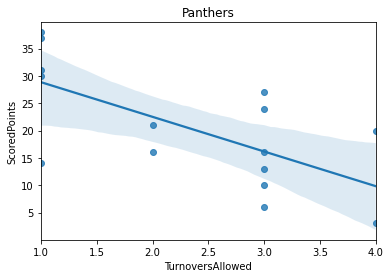

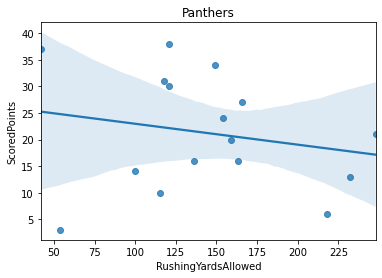

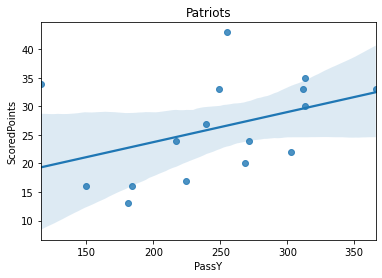

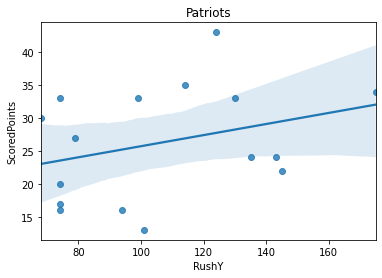

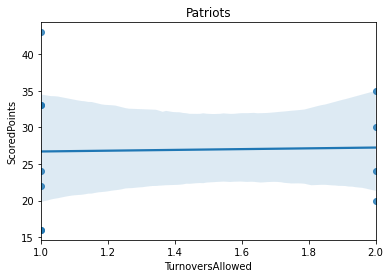

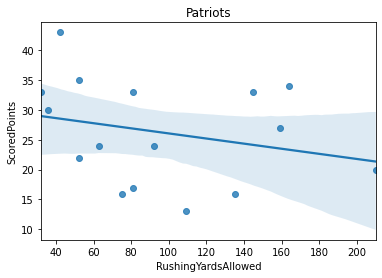

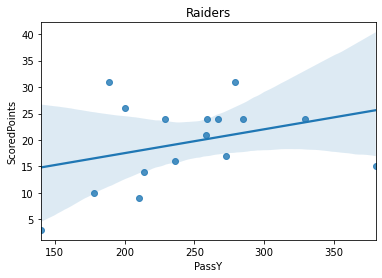

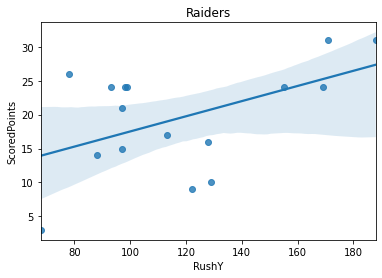

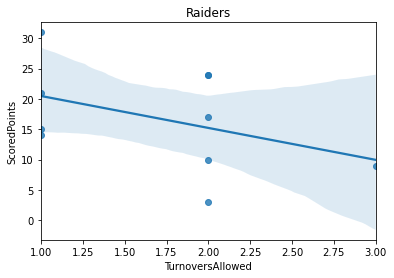

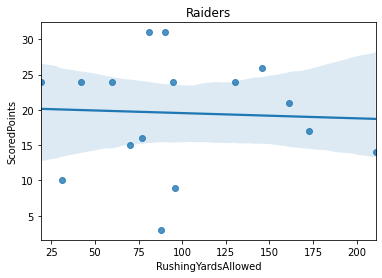

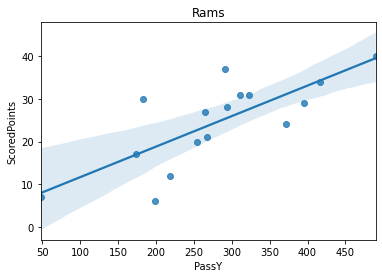

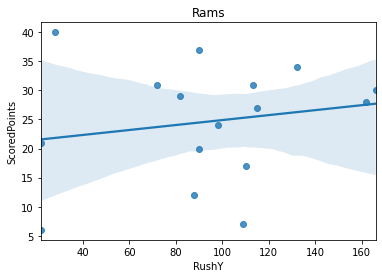

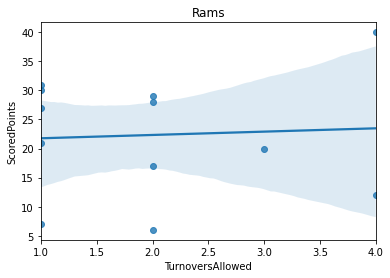

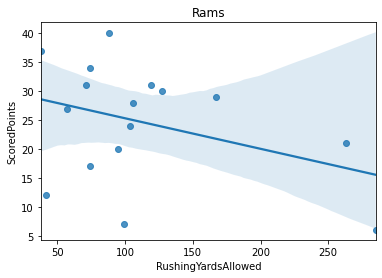

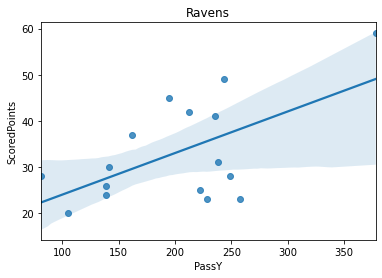

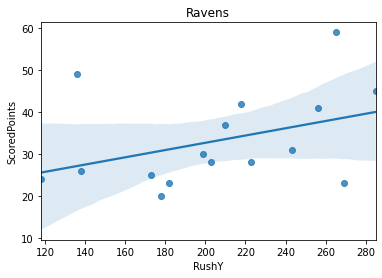

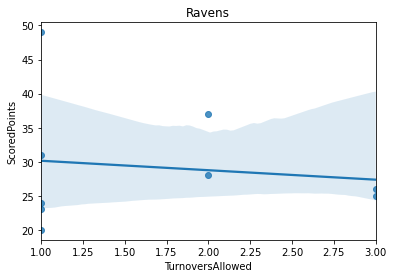

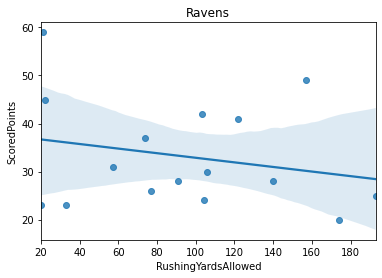

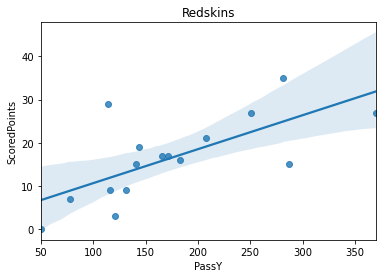

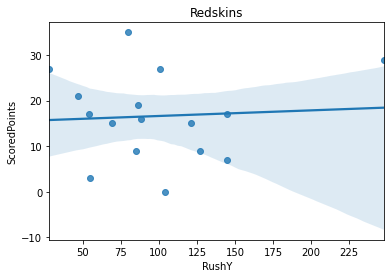

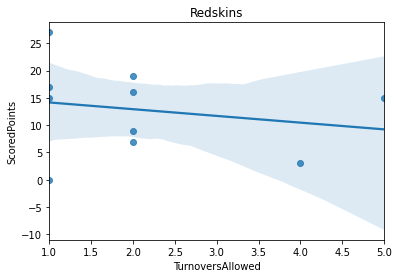

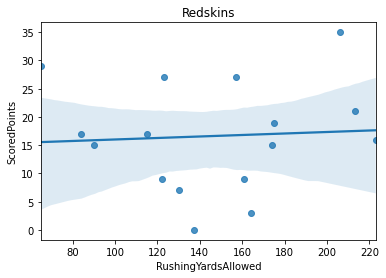

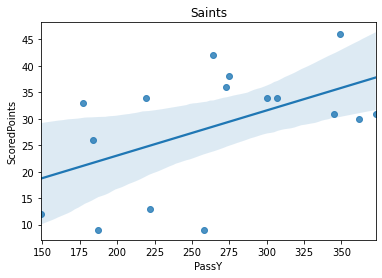

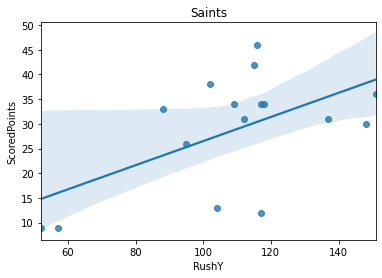

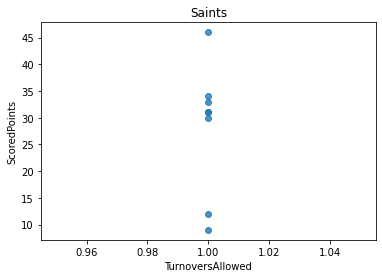

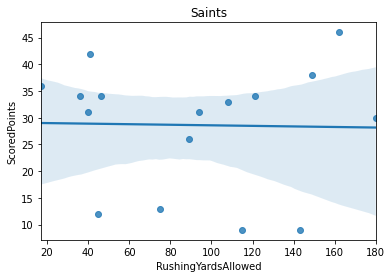

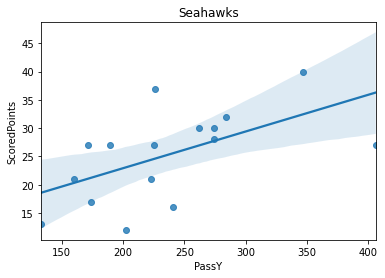

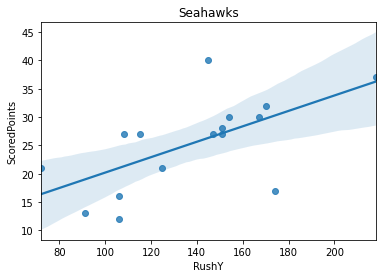

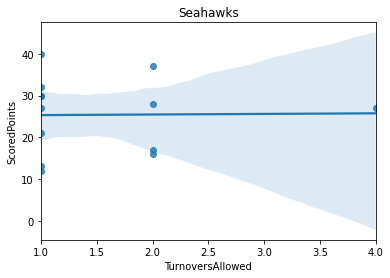

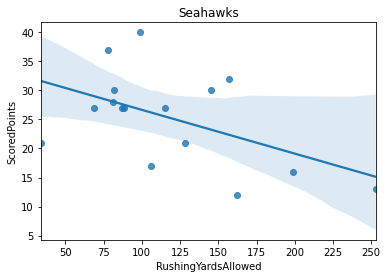

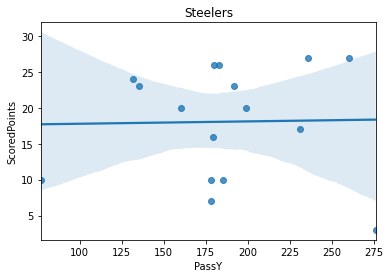

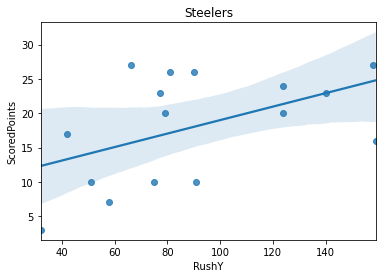

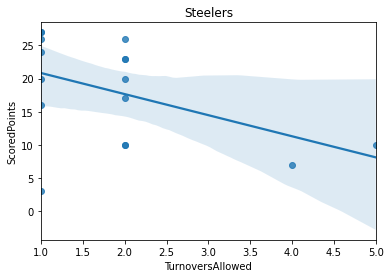

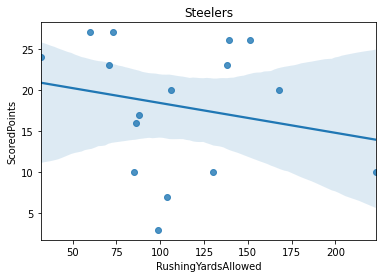

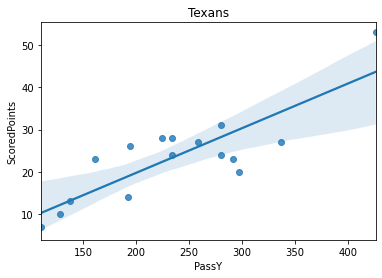

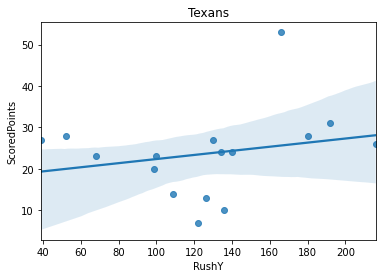

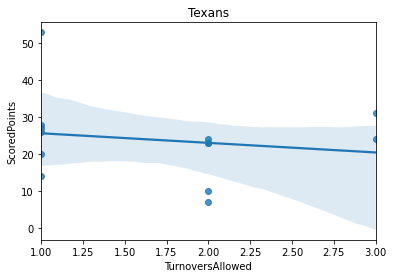

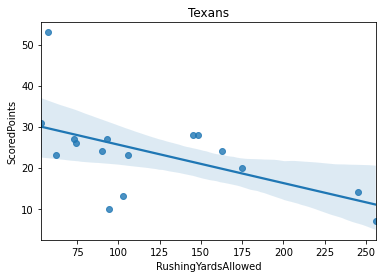

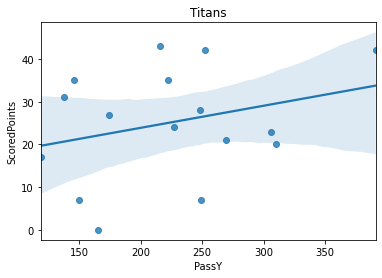

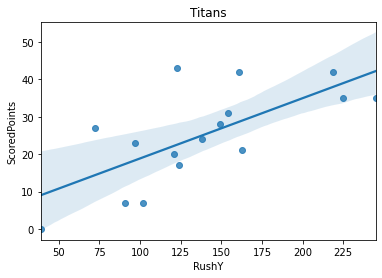

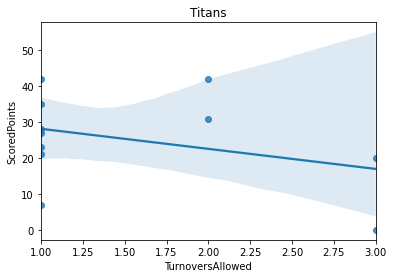

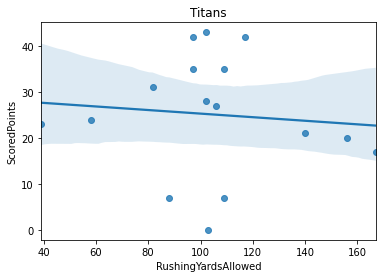

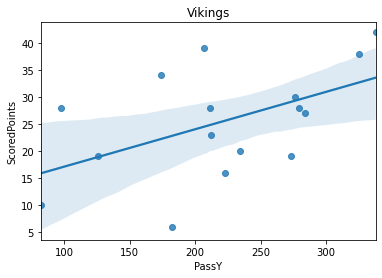

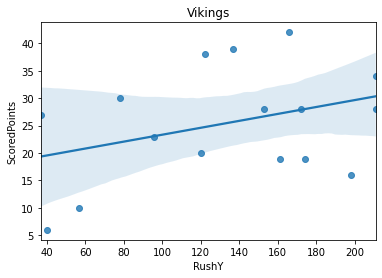

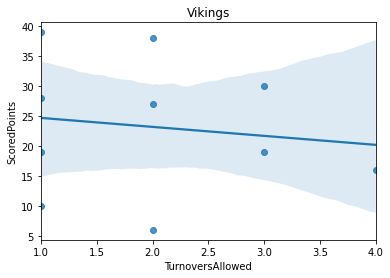

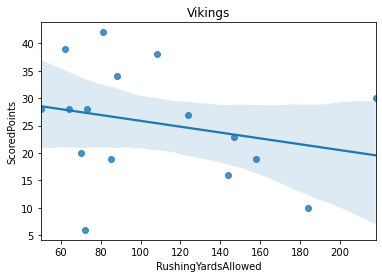

In [5]:
#Plotting variables that have high correlation to scoring
cnt = 1
for title, group in team_stats_init.groupby('Team Name'):
    plt.figure(cnt)
    sns.regplot(x= 'PassY', y= 'ScoredPoints', data= group)
    plt.title(title)
    cnt += 1
    plt.figure(cnt)
    sns.regplot(x= 'RushY', y= 'ScoredPoints', data= group)
    plt.title(title)
    cnt += 1
    plt.figure(cnt)
    sns.regplot(x= 'TurnoversAllowed', y= 'ScoredPoints', data= group)
    plt.title(title)
    cnt += 1
    plt.figure(cnt)
    sns.regplot(x= 'RushingYardsAllowed', y= 'ScoredPoints', data= group)
    plt.title(title)
    cnt += 1





Text(0.5, 1.0, 'Points Scored vs Rushing Yards Allowed Across All NFL Teams in the 2019 Season')

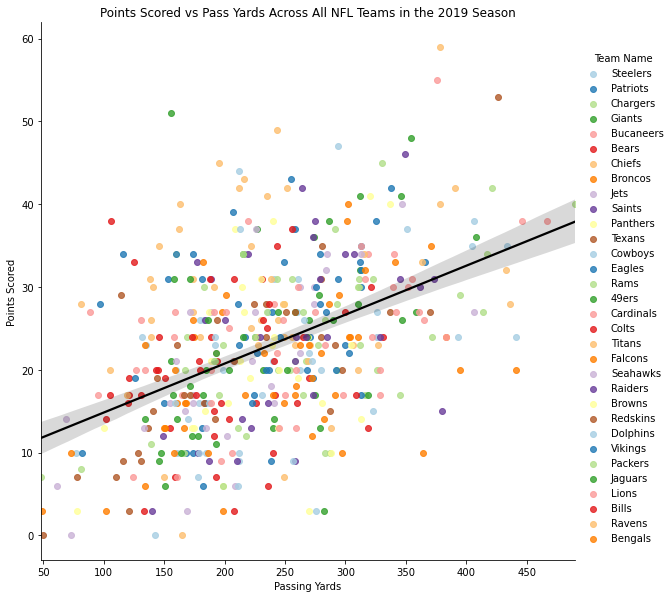

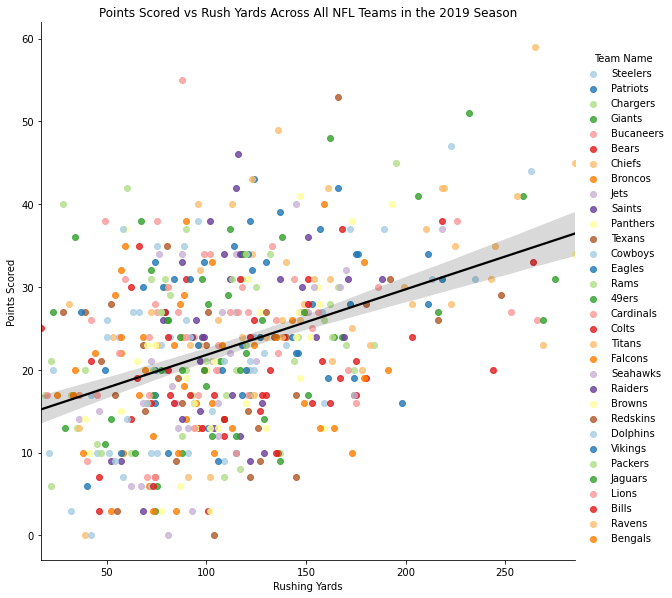

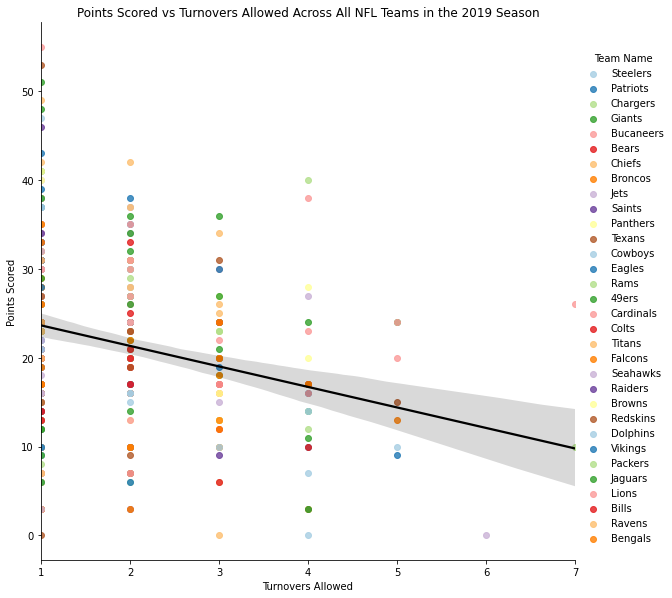

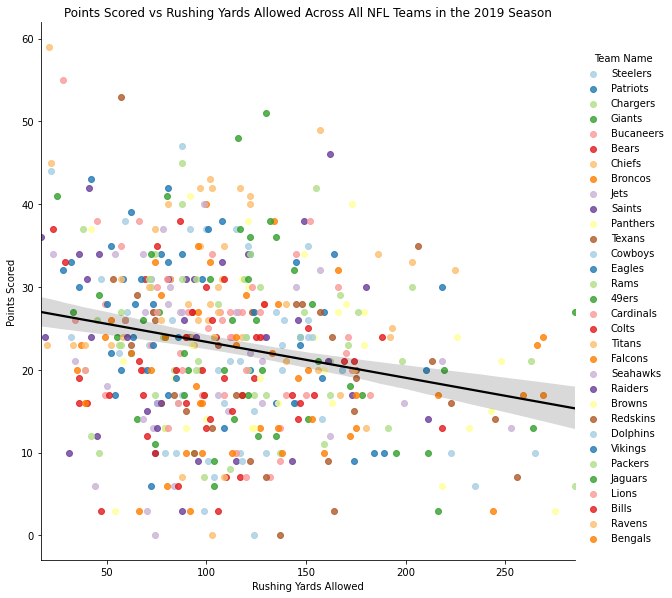

In [7]:
#Plotting combined statistics across all teams

Pass_Yards = sns.lmplot(x= 'PassY', y= 'ScoredPoints', palette= sns.color_palette("Paired"), hue= 'Team Name',data= team_stats_init, height= 8, fit_reg= False)
sns.regplot(x="PassY", y="ScoredPoints", data=team_stats_init, scatter=False, ax= Pass_Yards.axes[0, 0], line_kws={"color": "black"})
plt.xlabel("Passing Yards")
plt.ylabel("Points Scored")
plt.title("Points Scored vs Pass Yards Across All NFL Teams in the 2019 Season")

Rush_Yards = sns.lmplot(x= 'RushY', y= 'ScoredPoints', palette= sns.color_palette("Paired"), hue= 'Team Name',data= team_stats_init, height= 8, fit_reg= False)
sns.regplot(x="RushY", y="ScoredPoints", data=team_stats_init, scatter=False, ax= Rush_Yards.axes[0, 0], line_kws={"color": "black"})
plt.xlabel("Rushing Yards")
plt.ylabel("Points Scored")
plt.title("Points Scored vs Rush Yards Across All NFL Teams in the 2019 Season")

Turnovers_Allowed = sns.lmplot(x= 'TurnoversAllowed', y= 'ScoredPoints', palette= sns.color_palette("Paired"), hue= 'Team Name',data= team_stats_init, height= 8, fit_reg= False)
sns.regplot(x="TurnoversAllowed", y="ScoredPoints", data=team_stats_init, scatter=False, ax= Turnovers_Allowed.axes[0, 0], line_kws={"color": "black"})
plt.xlabel("Turnovers Allowed")
plt.ylabel("Points Scored")
plt.title("Points Scored vs Turnovers Allowed Across All NFL Teams in the 2019 Season")

Rushing_Yards_Allowed = sns.lmplot(x= 'RushingYardsAllowed', y= 'ScoredPoints', palette= sns.color_palette("Paired"), hue= 'Team Name',data= team_stats_init, height= 8, fit_reg= False)
sns.regplot(x="RushingYardsAllowed", y="ScoredPoints", data=team_stats_init, scatter=False, ax= Rushing_Yards_Allowed.axes[0, 0], line_kws={"color": "black"})
plt.xlabel("Rushing Yards Allowed")
plt.ylabel("Points Scored")
plt.title("Points Scored vs Rushing Yards Allowed Across All NFL Teams in the 2019 Season")


In [8]:
test_train_data = pd.DataFrame(columns=['Team Name', 'Scored Points', 'Expected Pass Yards'])
for title, group in team_stats_init.groupby('Team Name'):
  
    series = group.iloc[:, 5:6]
    values = pd.DataFrame(series.values)
    averages = {}
    lst = []
    add_to_subset = {}
    for index in range(values.shape[0]):
        if index > 0:
            ele = values.iloc[:index, :].mean(numeric_only= True)
            lst.append(ele.values[0])
        else:
            lst.append(0)

    averages[0] = lst
    averages = pd.DataFrame(averages)
    averages.replace(0, np.nan, inplace=True)
    averages.columns = ['Expected Pass Yards']

    add_to_subset['Team Name'] = [title] * 17
    add_to_subset = pd.DataFrame(add_to_subset, columns = ["Team Name"])
    add_to_subset['Scored Points'] = group['ScoredPoints'].values
    add_to_subset['Opponent'] = group['Against'].values
    add_to_subset['Expected Pass Yards'] = averages['Expected Pass Yards']
    
    test_train_data = pd.concat([test_train_data, add_to_subset], ignore_index = True)
    
    



In [9]:
rushing_column = pd.DataFrame(columns= ["Expected Rushing Yards"])
for title, group in team_stats_init.groupby('Team Name'):
  
    series = group.iloc[:, 6:7]
    values = pd.DataFrame(series.values)
    averages = {}
    lst = []
    add_to_subset = {}
    for index in range(values.shape[0]):
        if index > 0:
            ele = values.iloc[:index, :].mean(numeric_only= True)
            lst.append(ele.values[0])
        else:
            lst.append(0)

    averages[0] = lst
    averages = pd.DataFrame(averages)
    averages.replace(0, np.nan, inplace=True)
    averages.columns = ['Expected Rushing Yards']
    add_to_subset['Expected Rushing Yards'] = averages['Expected Rushing Yards'].values
    
    add_to_subset = pd.DataFrame(add_to_subset, columns = ["Expected Rushing Yards"])

    rushing_column = pd.concat([rushing_column, add_to_subset])
    

test_train_data["Expected Rushing Yards"] = rushing_column['Expected Rushing Yards'].values



In [10]:
turnovers_column = pd.DataFrame(columns= ["Expected Turnovers Allowed"])

for title, group in team_stats_init.groupby('Team Name'):
  
    series = group.iloc[:, 7:8]
    values = pd.DataFrame(series.values)
    averages = {}
    lst = []
    add_to_subset = {}
    for index in range(values.shape[0]):
        if index > 0:
            ele = values.iloc[:index, :].mean(numeric_only= True)
            lst.append(ele.values[0])
        else:
            lst.append(0)

    averages[0] = lst
    averages = pd.DataFrame(averages)
    averages.replace(0, np.nan, inplace=True)
    averages.columns = ['Expected Turnovers Allowed']
    add_to_subset['Expected Turnovers Allowed'] = averages['Expected Turnovers Allowed'].values
    
    add_to_subset = pd.DataFrame(add_to_subset, columns = ["Expected Turnovers Allowed"])

    turnovers_column = pd.concat([turnovers_column, add_to_subset])
    

test_train_data["Expected Turnovers Allowed"] = turnovers_column['Expected Turnovers Allowed'].values

In [11]:
rushing_allowed_column = pd.DataFrame(columns= ["Expected Rushing Yards Allowed"])
for title, group in team_stats_init.groupby('Team Name'):
  
    series = group.iloc[:, 11:12]
    values = pd.DataFrame(series.values)
    averages = {}
    lst = []
    add_to_subset = {}
    for index in range(values.shape[0]):
        if index > 0:
            ele = values.iloc[:index, :].mean(numeric_only= True)
            lst.append(ele.values[0])
        else:
            lst.append(0)

    averages[0] = lst
    averages = pd.DataFrame(averages)
    averages.replace(0, np.nan, inplace=True)
    averages.columns = ['Expected Rushing Yards Allowed']
    add_to_subset['Expected Rushing Yards Allowed'] = averages['Expected Rushing Yards Allowed'].values
    
    add_to_subset = pd.DataFrame(add_to_subset, columns = ["Expected Rushing Yards Allowed"])

    rushing_allowed_column = pd.concat([rushing_allowed_column, add_to_subset])
    

test_train_data["Expected Rushing Yards Allowed"] = rushing_allowed_column['Expected Rushing Yards Allowed'].values
test_train_data['Weeks'] = team_stats_init['Week']
test_train_data.to_csv(r"data_for_models/test_train_data.csv")
test_train_data.head(34)

Team Name  Scored Points  Expected Pass Yards              Opponent  \
0      49ers           31.0                  NaN  Tampa Bay Buccaneers   
1      49ers           41.0           158.000000    Cincinnati Bengals   
2      49ers           24.0           235.000000   Pittsburgh Steelers   
3      49ers            NaN           246.000000              Bye Week   
4      49ers           31.0           246.000000      Cleveland Browns   
5      49ers           20.0           227.250000      Los Angeles Rams   
6      49ers            9.0           228.200000   Washington Redskins   
7      49ers           51.0           214.500000     Carolina Panthers   
8      49ers           28.0           206.142857     Arizona Cardinals   
9      49ers           24.0           219.125000      Seattle Seahawks   
10     49ers           36.0           218.666667     Arizona Cardinals   
11     49ers           37.0           237.600000     Green Bay Packers   
12     49ers           17.0           236.636364      Baltimore Ravens   
13     49ers           48.0           230.000000    New Orleans Saints   
14     49ers           22.0           239.538462       Atlanta Falcons   
15     49ers           34.0           236.214286      Los Angeles Rams   
16     49ers           26.0           234.800000      Seattle Seahawks   
17     Bears            3.0                  NaN     Green Bay Packers   
18     Bears           16.0           208.000000        Denver Broncos   
19     Bears           31.0           164.000000   Washington Redskins   
20     Bears           16.0           178.666667     Minnesota Vikings   
21     Bears           21.0           183.250000       Oakland Raiders   
22     Bears            NaN           185.400000              Bye Week   
23     Bears           25.0           185.400000    New Orleans Saints   
24     Bears           16.0           193.666667  Los Angeles Chargers   
25     Bears           14.0           198.285714   Philadelphia Eagles   
26     Bears           20.0           186.250000         Detroit Lions   
27     Bears            7.0           181.666667      Los Angeles Rams   
28     Bears           19.0           182.800000       New York Giants   
29     Bears           24.0           190.727273         Detroit Lions   
30     Bears           31.0           202.416667        Dallas Cowboys   
31     Bears           13.0           204.615385     Green Bay Packers   
32     Bears            3.0           212.785714    Kansas City Chiefs   
33     Bears           21.0           207.466667     Minnesota Vikings   

    Expected Rushing Yards  Expected Turnovers Allowed  \
0                      NaN                         NaN   
1                98.000000                    2.000000   
2               178.500000                    1.500000   
3               175.000000                    2.666667   
4               175.000000                    2.666667   
5               200.000000                    2.666667   
6               179.800000                    2.500000   
7               172.666667                    2.200000   
8               181.142857                    2.000000   
9               171.125000                    2.000000   
10              161.777778                    2.142857   
11              149.000000                    2.125000   
12              145.636364                    2.125000   
13              148.000000                    2.000000   
14              149.076923                    1.900000   
15              147.000000                    1.909091   
16              145.133333                    1.916667   
17                     NaN                         NaN   
18               46.000000                    1.000000   
19               99.500000                    1.000000   
20               96.333333                    1.000000   
21               90.250000                    1.000000   
22               80.600000                    1.333333   
23               80.

In [12]:
test_train_data.fillna(test_train_data.mean(), inplace=True)


X = test_train_data[["Expected Pass Yards", "Expected Rushing Yards", "Expected Turnovers Allowed", "Expected Rushing Yards Allowed"]]
y = np.ravel(test_train_data[['Scored Points']])
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
clf = RandomForestRegressor(max_depth=1000, random_state=1)

clf.fit(X_train, y_train)
score_train = clf.score(X_test,y_test)

print(score_train)



0.050855778359101045


Text(0.5, 1.0, 'Predicted Score vs. Expected Score')

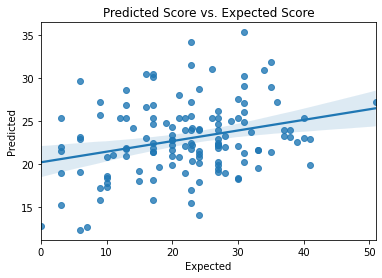

In [13]:
p1 = sns.regplot(x = y_test, y= clf.predict(X_test))
plt.xlabel("Expected")
plt.ylabel("Predicted")
plt.title("Predicted Score vs. Expected Score")

In [14]:
final_df = pd.DataFrame(columns= ["ExpectedPointsScored", "ActualPointsScored"])
final_df['ExpectedPointsScored'] = clf.predict(X_test)
final_df['ActualPointsScored'] = y_test
lin_reg_test = statsmodels.formula.api.ols(formula="ExpectedPointsScored ~ ActualPointsScored", data=final_df).fit()
print(lin_reg_test.summary())

                             OLS Regression Results                             
Dep. Variable:     ExpectedPointsScored   R-squared:                       0.081
Model:                              OLS   Adj. R-squared:                  0.074
Method:                   Least Squares   F-statistic:                     11.75
Date:                  Fri, 18 Dec 2020   Prob (F-statistic):           0.000807
Time:                          17:53:24   Log-Likelihood:                -382.51
No. Observations:                   136   AIC:                             769.0
Df Residuals:                       134   BIC:                             774.8
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

In [15]:
final_df.head(20)


ExpectedPointsScored  ActualPointsScored
0              14.140521             24.0000
1              31.840000             35.0000
2              22.986875             27.0000
3              18.202188             17.0000
4              22.822510             20.0000
5              19.958125             20.0000
6              21.972717              3.0000
7              19.920000             27.0000
8              17.050000             22.8125
9              15.277917              3.0000
10             21.509350             24.0000
11             20.802708             10.0000
12             18.438125             30.0000
13             29.700000              6.0000
14             19.560625             33.0000
15             20.290771             27.0000
16             21.848625             27.0000
17             28.950000             35.0000
18             22.056094             28.0000
19             21.734870             22.8125

In [16]:
final_df['Differences'] = abs(final_df['ActualPointsScored']- final_df['ExpectedPointsScored'])

details = final_df.apply(lambda x : True
            if x['Differences'] <= 7 else False, axis = 1) 
num_rows = len(final_df[details == True].index)
print(num_rows/ len(final_df))



0.5220588235294118
